# ACA-Py & ACC-Py Verifier Template

## Copy this template into the root folder of your notebook workspace to get started

### Imports

In [ ]:
from aries_cloudcontroller import AriesAgentController

from libs.performance_service import PerformanceService
import os
import time
from termcolor import colored

### Initialise the Agent Controller

In [ ]:
api_key = os.getenv("ACAPY_ADMIN_API_KEY")
admin_url = os.getenv("ADMIN_URL")

print(f"Initialising a controller with admin api at {admin_url} and an api key of {api_key}")
agent_controller = AriesAgentController(admin_url,api_key)

### Start a Webhook Server

In [ ]:
webhook_port = int(os.getenv("WEBHOOK_PORT"))
webhook_host = "0.0.0.0"

await agent_controller.init_webhook_server(webhook_host, webhook_port)

print(f"Listening for webhooks from agent at http://{webhook_host}:{webhook_port}")

## Store Issuing Schema and Cred Def Identifiers

If you intend for this agent to issue credentials you should first initialise your agent as an issuer and author the relevant identifiers to the public ledger. The issuer_initialisation recipe notebook can be duplicated and used as a starting point.

Once schema and cred def identifiers are created copy across and store in variables as illustrated in the cell below. Be sure to use unique names for each variable.

In [ ]:
schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:one-attrib:0.0.2'
cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:8:default'
rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:8:revocable'

five_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:five-attrib:0.0.1'
five_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:9:default'
five_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:9:revocable'

ten_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:ten-attrib:0.0.1'
ten_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:10:default'
ten_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:10:revocable'

twenty_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:twenty-attrib:0.0.1'
twenty_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:11:default'
twenty_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:11:revocable'

fifty_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:fifty-attrib:0.0.1'
fifty_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:12:default'
fifty_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:12:revocable'

hundred_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:hundred-attrib:0.0.1'
hundred_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:13:default'
hundred_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:13:revocable'




## Init Performance Service

In [ ]:
performance_service = PerformanceService(agent_controller, iterations=20)

## Establish Connection

Before you can issue a credential you must first establish a connection across which the credential will be issued to a holder. (see recipes/connection)

In [ ]:
# Alias for invited connection
alias = "Friend"
auto_accept = "true"
# Use public DID?
public = "false"
# Should this invitation be usable by multiple invitees?
multi_use = "false"

invitation_response = await agent_controller.connections.create_invitation(alias, auto_accept, public, multi_use)
# Is equivalent to above. Arguments are optionally
# invitation_response = await agent_controller.connections.create_invitation()



# You will use this identifier to issue a credential across this connection
connection_id = invitation_response["connection_id"]

invitation = invitation_response["invitation"]
## Copy this output
print(invitation)
print(connection_id)

In [ ]:
connection_id = "2782d60f-65d0-4e14-8e28-55fa38735468"

## Define Presentation Request Object

The below cell defines a generic presentation request object, that can be sent across specific connections requesting that they produce a presentation containing the identified attributes and meeting the restrictions.

It is often useful to define your request objects first, then reuse these objects across many connections you wish to request a proof from. 

Duplicate and customise the below cell as many times as you need. It may be useful to save these request objects either to the jupyter store using %store or through

TODO: Detail the full set of restrictions available to a verifier.

In [ ]:
# # We add a constraint that the attribute must originate from this schema
# schema_id = "<SOME SCHEMA ID>"

# trusted_issuer_did = "<SOME ISSUER DID ON INDY NETWORK>"

# cred_def_id = "<SOME CRED DEF>"

# # Define the list of attributes and restrictions under which each attribute was issued that a prover must satisfy with a presentation
# # NOTE: if identifying a schema or credential definition then the attribute name must be contained within the corresponding schema.
# req_attrs = [
#     {"name": "<attr_name_1>", "restrictions": [{"schema_id": schema_id}]},
#     {"name": "<attr_name_2>", "restrictions": [{"cred_def_id": cred_def_id}]},
#     #NOTE: you do not need to specify any restrictions. This means the prover can present a self-attested attribute to satisfy this request. 
#     # Although the business logic (this notebook) can still determine this is unacceptable.
#     {"name": "<attr_name_3>", "restrictions":[]}
#     # You can also specify individual attributes be non-revoked
#     {"name": "<attr_name_4>", "restrictions": [], "non_revoked": {"to": int(time.time() - 1)}}
# ]

# # We could extend this to request the name attribute aswell if we wanted.


# proof_request = {
#     "name": "Name of Proof Request",
#     "version": "1.0",

#     # Predicates allow us to specify range proofs or set membership on attributes. For example greater than 10.
#     # We will ignore these for now.
#     "requested_predicates": {
# #         f"0_{req_pred['name']}_GE_uuid":
# #         req_pred for req_pred in req_preds
#     },
#     # You can also request the entire proof request be non-revoked
#     "non_revoked":  {"to": int(time.time())}
# }

In [ ]:
proof_request = {
    "name": "Name of Proof Request",
    "version": "1.0",

    # Predicates allow us to specify range proofs or set membership on attributes. For example greater than 10.
    # We will ignore these for now.
    "requested_predicates": {
#         f"0_{req_pred['name']}_GE_uuid":
#         req_pred for req_pred in req_preds
    },
    # You can also request the entire proof request be non-revoked
    "non_revoked":  {"to": int(time.time())}
}

# Single Disclosed Attribute from Variable Size Credential Experiment


In [ ]:
experiment = performance_service.new_experiment("Single Attribute from Variable Credentials - Non Revocable")


In [ ]:
revocable_experiment = performance_service.new_experiment("Single Attribute from Variable Credential - Revocable")

## Performance Test - One Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": schema_id, "cred_def_id": cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "1"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": schema_id, "cred_def_id": rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Performance Test - Five Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "5"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Performance Test - Fice Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "10"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Performance Test - Twenty Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "20"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Performance Test - Fifty Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "50"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Performance Test - Hundred Attribute Credential

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": hundred_schema_id, "cred_def_id": hundred_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "100"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": hundred_schema_id, "cred_def_id": hundred_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Plot Results

### Non Revocable

In [ ]:
data = []
labels = []
non_revocable_averages = []
for result in experiment["results"]:
    
    if result["name"] != "1":
        millitimings = [i * 1000 for i in result["timings"]]
        data.append(millitimings)
        non_revocable_averages.append(result["average"] * 1000)
        labels.append(result["name"])



In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Credential Size (Bytes)")

plt.savefig("single_attrib_variable_cred_box_plot_non_revocable.png")

### Revocable

In [ ]:
data = []
labels = []
revocable_averages = []
for result in revocable_experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Credential Size (Bytes)")

plt.savefig("single_attrib_variable_cred_box_plot_revocable.png")

## Averages

In [ ]:
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 

# avg_ploy = plt.plot(labels, revocable_averages, non_revoked_averages)

plt.plot(labels, revocable_averages,'r-',label='Revocable Credential Presentation Averages')
plt.plot(labels, non_revocable_averages,label='Non Revocable Credential Presentation Averages')

plt.ylabel("Milliseconds")
plt.xlabel("Credential_size (Bytes)")


plt.legend()
plt.savefig("single_attrib_variable_cred_averages.png")

# Fixed Credential Variable Attributes Disclosed

In [ ]:
experiment = performance_service.new_experiment("Fixed Credential Variable Attributes Disclosed")

In [ ]:
revocable_experiment = performance_service.new_experiment("Fixed Credential Variable Attributes Disclosed - Revocable")

## One Attribute

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "1"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Two Attribute

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "2"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Five Attribute

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "5"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Ten Attribute

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "6", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "7", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "8", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "9", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "10", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "10"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "6", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "7", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "8", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "9", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "10", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Twenty Attribute

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "6", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "7", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "8", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "9", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "10", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "11", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "12", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "13", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "14", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "15", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "16", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "17", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "18", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "19", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "20", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
name = "20"

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

In [ ]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "6", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "7", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "8", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "9", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "10", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "11", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "12", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "13", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "14", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "15", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "16", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "17", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "18", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "19", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "20", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [ ]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

## Plot Results

### Non Revocable

In [ ]:
data = []
labels = []
non_revocable_averages = []
for result in experiment["results"]:
    

    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    non_revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])



In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.savefig("fixed_cred_variable_disclosure_box_plot_non_revocable.png")

### Revocable

In [ ]:
help(plt.axes)

In [ ]:
data = []
labels = []
revocable_averages = []
for result in revocable_experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


In [ ]:
print(labels)

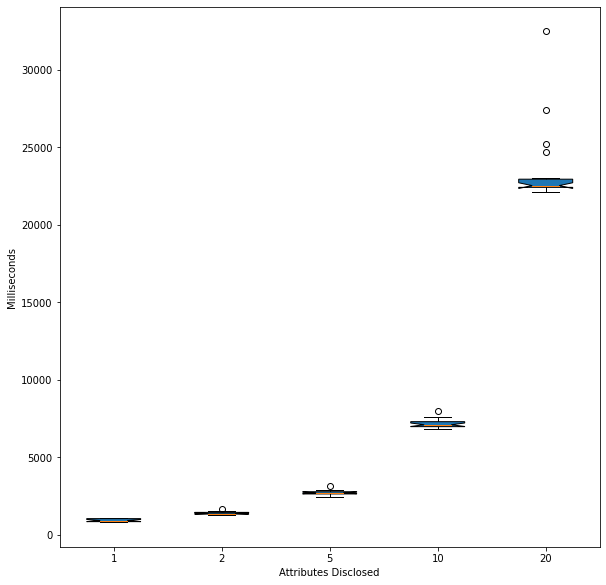

In [186]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.savefig("fixed_cred_variable_disclosure_box_plot_revocable.png")

## Averages

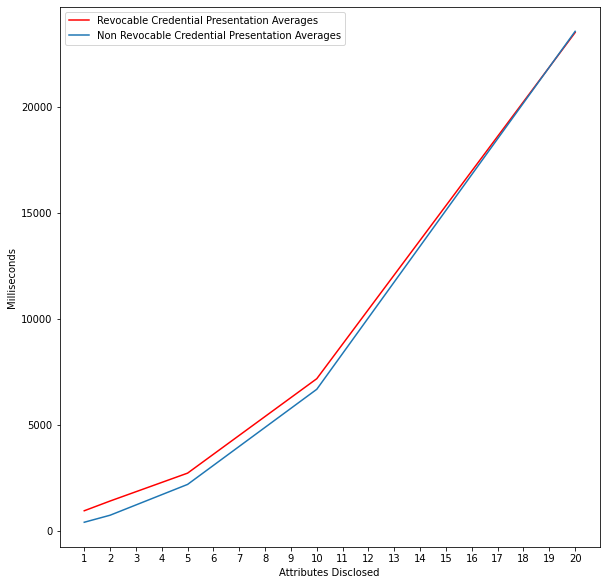

In [191]:
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 

new_labels = [int(i) for i in labels]
# avg_ploy = plt.plot(labels, revocable_averages, non_revoked_averages)



plt.plot(new_labels, revocable_averages,'r-',label='Revocable Credential Presentation Averages')
plt.plot(new_labels, non_revocable_averages,label='Non Revocable Credential Presentation Averages')

plt.xticks(range(1,21))

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.legend()
plt.savefig("fixed_cred_variable_disclosure_averages.png")

# Fixed Attributes Disclosed Variable Credentials in Presentation

In [159]:
experiment = performance_service.new_experiment("Fixed Attributes Disclosed Variable Credentials in Presentation")

In [160]:
revocable_experiment = performance_service.new_experiment("Fixed Attributes Disclosed Variable Credentials in Presentation")

## Five Attributes One Cred

In [161]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [162]:
name = "1"

In [163]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

Average :  1.8861745626498305


In [164]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [165]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

Average :  2.888445556750412


## Five Attributes Two Cred

In [166]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [167]:
name = "2"

In [168]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

Average :  2.3859419959000663


In [169]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [170]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

Average :  3.760751254099887


## Five Attributes Three Cred

In [171]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [172]:
name = "3"

In [173]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

Average :  2.2802539874501235


In [174]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [175]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

Average :  4.044143925350181


## Five Attributes Four Cred

In [176]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [177]:
name = "4"

In [178]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

Average :  2.808775784350291


In [179]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [180]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

Average :  5.397983192500033


## Five Attributes Five Cred

In [181]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": hundred_schema_id, "cred_def_id": hundred_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [182]:
name = "5"

In [183]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(experiment, test, connection_id)

Average :  4.092076107749927


In [184]:
req_attrs = [
    {"name": "1", "restrictions": [{"schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id}]},
    {"name": "2", "restrictions": [{"schema_id": hundred_schema_id, "cred_def_id": hundred_rev_cred_def_id}]},
    {"name": "3", "restrictions": [{"schema_id": fifty_schema_id, "cred_def_id": fifty_rev_cred_def_id}]},
    {"name": "4", "restrictions": [{"schema_id": five_schema_id, "cred_def_id": five_rev_cred_def_id}]},
    {"name": "5", "restrictions": [{"schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id}]},
]

proof_request["requested_attributes"] = {
        # They generally follow this uuid pattern. Unique identifier for attribute within context of this proof request
        # Note that req_attr['name'] gets the attribute name of each object. E.g. domain and name in this case
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
}

In [185]:
test = {"name": name, "proof_request": proof_request}

await performance_service.run_verification(revocable_experiment, test, connection_id)

Average :  6.604865062400313


## Plot Results

### Non Revocable

In [193]:
data = []
labels = []
non_revocable_averages = []
for result in experiment["results"]:
    

    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    non_revocable_averages.append(result["average"] * 1000)
    labels.append(int(result["name"]))



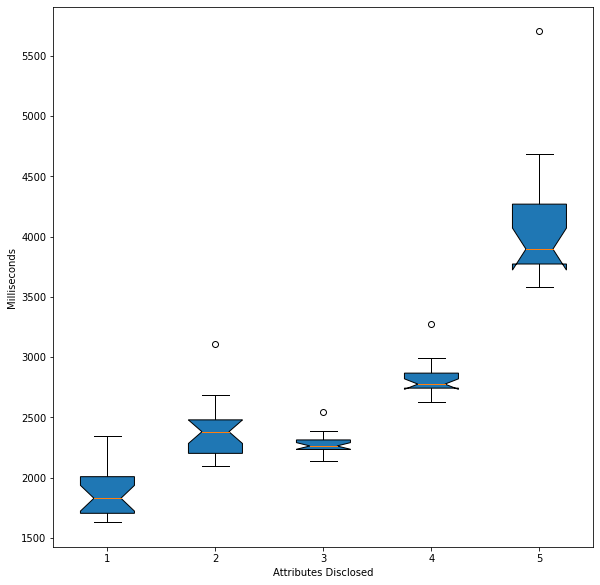

In [194]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.savefig("fixed_attributes_disclosed_variables_credentials_presented_box_plot_non_revocable.png")

### Revocable

In [195]:
data = []
labels = []
revocable_averages = []
for result in revocable_experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    revocable_averages.append(result["average"] * 1000)
    labels.append(int(result["name"]))
    


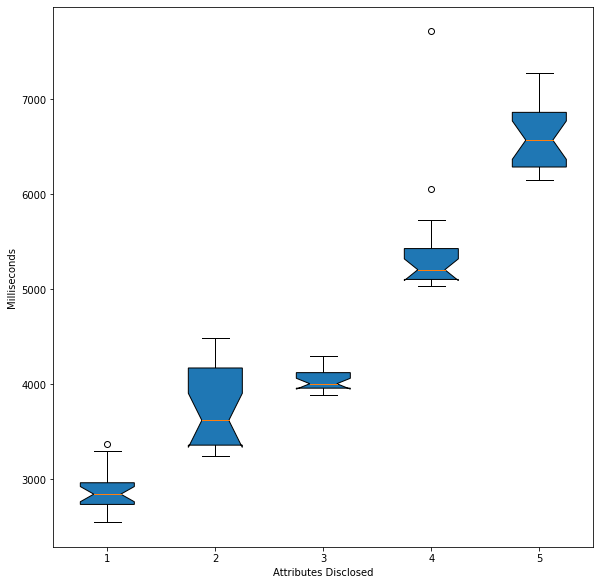

In [196]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.savefig("fixed_attributes_disclosed_variables_credentials_presented_box_plot_revocable.png")

## Averages

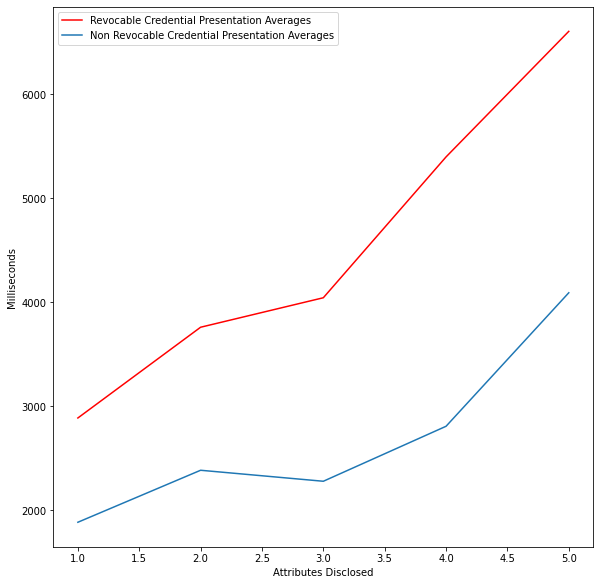

In [197]:
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 

new_labels = [int(i) for i in labels]
# avg_ploy = plt.plot(labels, revocable_averages, non_revoked_averages)

plt.plot(labels, revocable_averages,'r-',label='Revocable Credential Presentation Averages')
plt.plot(labels, non_revocable_averages,label='Non Revocable Credential Presentation Averages')

plt.ylabel("Milliseconds")
plt.xlabel("Attributes Disclosed")

plt.legend()
plt.savefig("fixed_attributes_disclosed_variables_credentials_presented_averages.png")

## Terminate Controller

Whenever you have finished with this notebook, be sure to terminate the controller. This is especially important if your business logic runs across multiple notebooks.

In [ ]:
await agent_controller.terminate()